<a href="https://colab.research.google.com/github/sapinspys/lambda-ds-precourse/blob/master/LSDS_Intro_Assignment_4_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev, median, mode

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
print(f"**Feature 1, Age** \n\nmedian: {median(df[features[0]])}\nmode: {mode(df[features[0]])}\n\n{df[features[0]].describe()}\n")
print(f"**Feature 2, Fare** \n\nmedian: {median(df[features[1]])}\nmode: {mode(df[features[1]])}\n\n{df[features[1]].describe()}\n")

**Feature 1, Age** 

median: 28.0
mode: 24.0

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

**Feature 2, Fare** 

median: 15.7417
mode: 13.0

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: fare, dtype: float64



Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

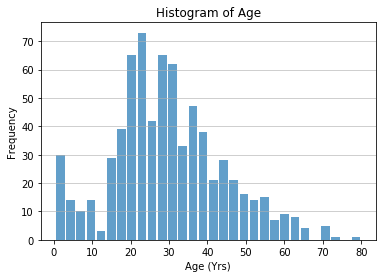

In [47]:
plt.hist(df[features[0]], bins=30, alpha=0.7, rwidth=0.85)
plt.xlabel('Age (Yrs)')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Our age data is positively skewed

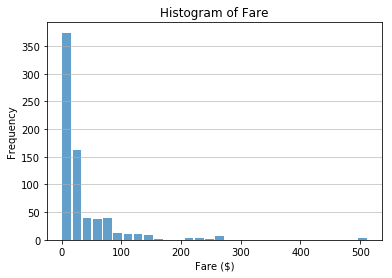

In [48]:
plt.hist(df[features[1]], bins=30, alpha=0.7, rwidth=0.85)
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Our fare data is also positively skewed

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [0]:
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']

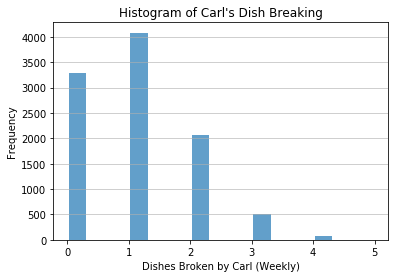

In [50]:
# Python's list comprehension is awesome!
# print([random.choice(dishwashers) for broken_dish in range(5)])

def experiment():
  breakers = [random.choice(dishwashers) for broken_dish in range(5)]
  return breakers.count('Carl')

results = [experiment() for x in range(10000)]

plt.hist(results, bins=15, alpha=0.7, rwidth=0.85)
plt.xlabel('Dishes Broken by Carl (Weekly)')
plt.ylabel('Frequency')
plt.title("Histogram of Carl's Dish Breaking")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [51]:
# Standard Score, z-score, of Carl breaking 2 dishes:

standard_score = (2 - mean(results))/stdev(results)
print(standard_score)

# How often Carl breaks 2+ dishes per week

print(f"{sum(result >= 2 for result in results)} weeks out of {len(results)} weeks")
print(f"{round((sum(result >= 2 for result in results)/len(results))*100, 2)}%")

1.1135556190286269
2635 weeks out of 10000 weeks
26.35%


In [65]:
'''The above percentage is also known as the p-value and is technically 
defined as the probability of getting results at least as extreme as the
ones you observed, given that the null hypothesis is correct'''

p_value = mean(result >= 2 for result in results)
print(p_value)

# We reject the null hypothesis (the skeptic) if p-value < 0.05

if p_value < 0.05:
  print("We reject the null hypothesis")
else:
  print("We do not reject the null hypothesis")

1
We do not reject the null hypothesis


# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

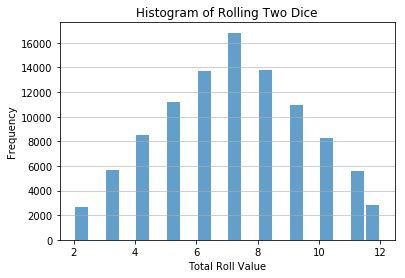

Mean: 6.99218
Standard Deviation: 2.4177421910478842


In [60]:
# Simulating rolling two dice to create our data set

def roll_two_dice(sides=6, rolls=100):
  return [(random.randint(1, sides)+random.randint(1, sides)) for x in range(rolls)]

results = roll_two_dice(6, 100000)

plt.hist(results, bins=20, alpha=0.7, rwidth=0.85)
plt.xlabel('Total Roll Value')
plt.ylabel('Frequency')
plt.title("Histogram of Rolling Two Dice")
plt.grid(axis='y', alpha=0.75)
plt.show()


print(f"Mean: {mean(results)}\nStandard Deviation: {stdev(results)}")


What is the standard score (z score) of rolling a 10?

In [55]:
standard_score = (10 - mean(results))/stdev(results)
print(standard_score)

1.232332545926191


What is the probability of rolling a 10 or higher?

In [63]:
print(f"{sum(result >= 10 for result in results)} times out of {len(results)} rolls")
print(f"{round((sum(result >= 10 for result in results)/len(results))*100, 2)}% chance to roll a 10 or higher")

16647 times out of 100000 rolls
16.65% chance to roll a 10 or higher


# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round(len(x) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [69]:
means = [mean(bootstrap_sample(apples)) for x in range(10000)]
print(percentile(means, 5), percentile(means, 95))

0.41666666666666663 0.5833333333333333


... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 1, 3, 3, 591]

In [70]:
means = [mean(bootstrap_sample(pumpkins)) for x in range(10000)]
print(percentile(means, 5), percentile(means, 95))

1.3333333333333333 296.3333333333333
